### Feature Selection by Anova 
### Dataset - Numerical input & Categorical Output

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
import matplotlib as plt

In [123]:
diabetes = pd.read_csv('D:\Data for Preprocessing\Pima Indian diabetes.csv')

In [124]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


In [125]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [126]:
X = diabetes.iloc[:,:-1]

In [127]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [128]:
y = diabetes['Age']

In [129]:
# Split the Data into Train and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [130]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [131]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...,...
563,6,99,60,19,54,26.9,0.497,32
318,3,115,66,39,140,38.1,0.150,28
154,8,188,78,0,0,47.9,0.137,43
684,5,136,82,0,0,0.0,0.640,69


In [132]:
# Feature Selection by Anova 
fs = SelectKBest(score_func=f_classif, k='all')

# Learn relationship from training data
fs.fit(X_train, y_train)

# Transform Train input data
X_train_fs = fs.transform(X_train)

# Transform Test input data
X_test_fs = fs.transform(X_test) 


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [133]:
fs

SelectKBest(k='all')

In [134]:
fs_score = pd.DataFrame(fs.scores_)

In [135]:
fs_score

,0
0,9.728091
1,2.079959
2,1.869480
3,1.416199
4,1.161937
5,1.197975
6,1.275902
7,inf


In [136]:
fs_score.index = X.columns

In [137]:
fs_score

,0
Pregnancies,9.728091
Glucose,2.079959
BloodPressure,1.869480
SkinThickness,1.416199
Insulin,1.161937
BMI,1.197975
DiabetesPedigreeFunction,1.275902
Age,inf


In [138]:
fs_score = fs_score.rename({0:'Score'}, axis=1)

In [139]:
fs_score

,Score
Pregnancies,9.728091
Glucose,2.079959
BloodPressure,1.869480
SkinThickness,1.416199
Insulin,1.161937
BMI,1.197975
DiabetesPedigreeFunction,1.275902
Age,inf


<AxesSubplot:>

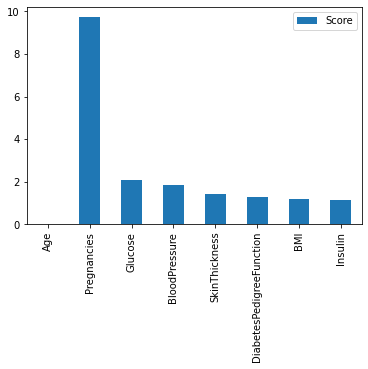

In [140]:
fs_score.sort_values(by = ['Score'], ascending=False).plot(kind = 'bar')

In [141]:
# Percnetage of each feature contribute out of Total in Feature selection Process
fs_score.drop('Age', axis=0)/(fs_score.drop('Age', axis=0).sum(axis=0))*100

,Score
Pregnancies,51.939821
Glucose,11.105229
BloodPressure,9.981448
SkinThickness,7.561312
Insulin,6.203768
BMI,6.396180
DiabetesPedigreeFunction,6.812241


### Feature Selection by Information Gain

In [142]:
# Feature Selection by Anova 
fs_IG = SelectKBest(score_func=mutual_info_classif, k='all')

# Learn relationship from training data
fs_IG.fit(X_train, y_train)

# Transform Train input data
X_train_fs = fs_IG.transform(X_train)

# Transform Test input data
X_test_fs = fs_IG.transform(X_test) 


In [143]:
fs_IG

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x0000022F838FE3A0>)

In [144]:
fs_score_IG = pd.DataFrame(fs_IG.scores_)

In [145]:
fs_score_IG

,0
0,0.331205
1,0.019072
2,0.098533
3,0.056877
4,0.040238
5,0.068396
6,0.021176
7,3.581522


In [146]:
fs_score_IG = fs_score_IG.rename({0:'Score'}, axis=1)

In [147]:
fs_score_IG

,Score
0,0.331205
1,0.019072
2,0.098533
3,0.056877
4,0.040238
5,0.068396
6,0.021176
7,3.581522


In [148]:
fs_score_IG.index = X.columns

In [149]:
fs_score_IG

,Score
Pregnancies,0.331205
Glucose,0.019072
BloodPressure,0.098533
SkinThickness,0.056877
Insulin,0.040238
BMI,0.068396
DiabetesPedigreeFunction,0.021176
Age,3.581522


<AxesSubplot:>

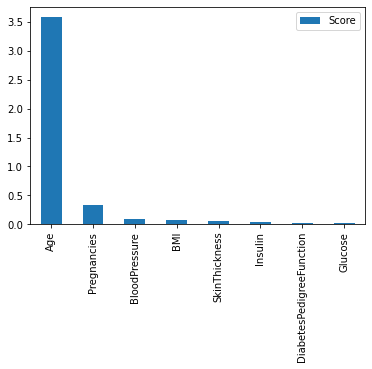

In [150]:
fs_score_IG.sort_values(by = ['Score'], ascending=False).plot(kind = 'bar')